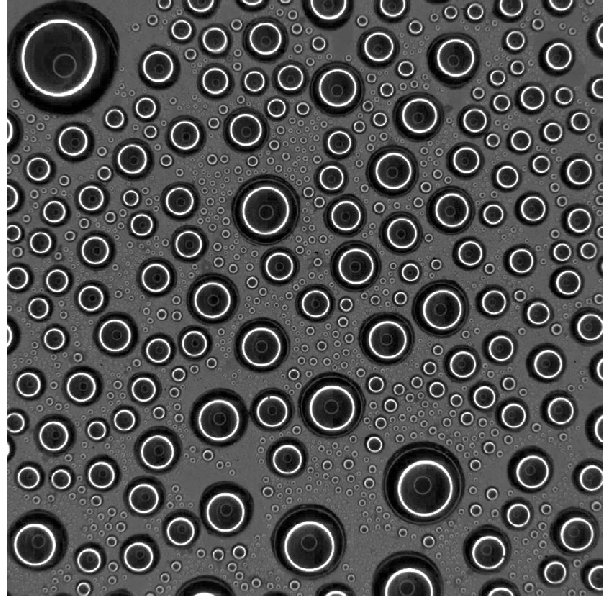

608
608


In [51]:
from PIL import Image
from pynq import Overlay, allocate
import numpy as np

overlay = Overlay('overlay.bit')
regs = overlay.resize_accel.register_map

#!wget https://live.staticflickr.com/194/474783096_0bfaf55e3d_q_d.jpg -O i.img
# Public Domain photo by NASA https://www.flickr.com/photos/39735679@N00/474783096

#Grey Scale Image

#im = Image.open('i.img')
#im = Image.open('bw.jpeg')
im = Image.open('gs.jpg')
display(im)

a,b = im.size
print(a)
print(b)

In [52]:
out_size = 64, 64

buf_in = allocate(
	(b,a), np.uint8, cacheable=True )
buf_in[:] = np.array(im)
buf_out = allocate(
	(out_size), np.uint8, cacheable=True )

regs.img_inp = buf_in.device_address
regs.img_out = buf_out.device_address
regs.rows_in, regs.cols_in = im.size
regs.rows_out, regs.cols_out = out_size

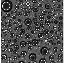

In [53]:
regs.CTRL.AP_START = 1

while regs.CTRL.AP_DONE == 0:
	pass

im_out = Image.fromarray(buf_out)

display(im_out)